<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/YB_0926(2)_exercises_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [8]:
apple=data

### Step 4.  Check out the type of the columns

In [12]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [13]:
apple.Date=pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [20]:
apple.index=apple.Date
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 7.  Is there any duplicate dates?

In [21]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [22]:
apple.index=apple.index.sort_values()
apple.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-07', '2014-07-08'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

### Step 9. Get the last business day of each month

In [35]:
print(apple.groupby([apple.index.year, apple.index.month]).tail(1).index)

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-10-31', '2013-11-29', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-30',
               '2014-06-30', '2014-07-08'],
              dtype='datetime64[ns]', name='Date', length=404, freq=None)


### Step 10.  What is the difference in days between the first day and the oldest

In [26]:
print(apple.index[-1]-apple.index[0])

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [31]:
month=apple.index.month
month.value_counts().sort_index()

,count
Date,
1,705
2,652
3,744
4,703
5,718
6,727
7,703
8,730
9,669


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

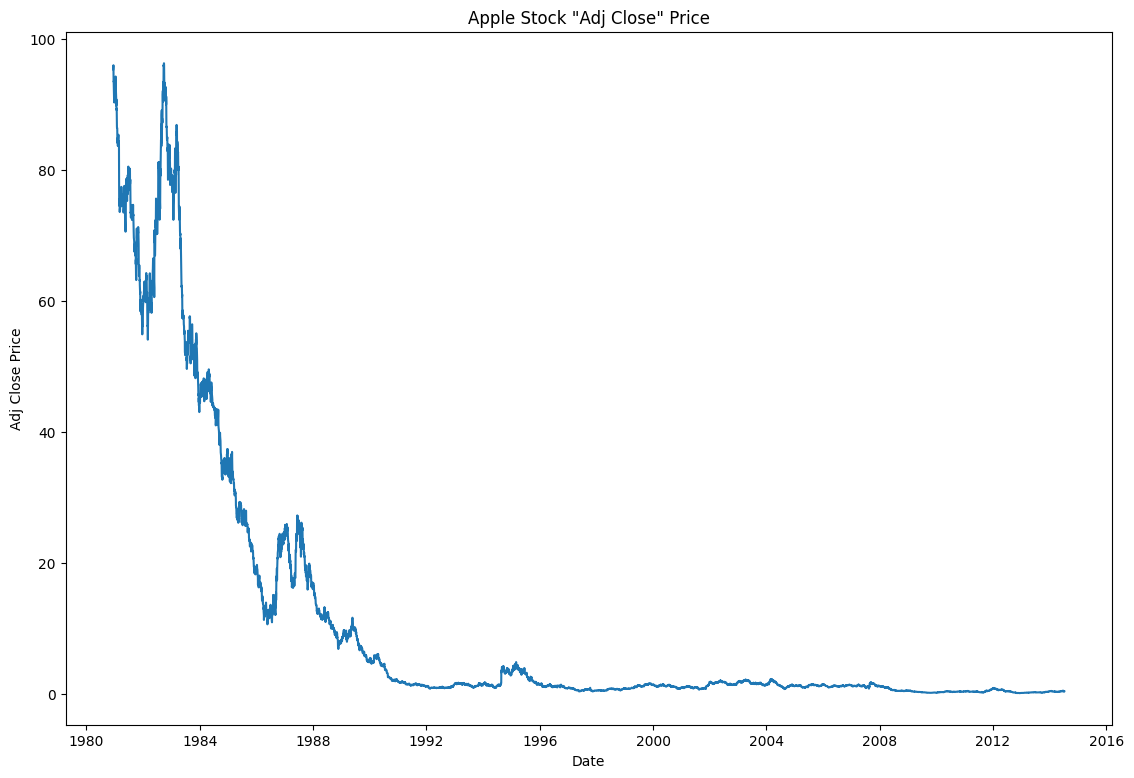

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close'])
plt.title('Apple Stock "Adj Close" Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()